**1. Import library and load dataset**

In [0]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [0]:
train  = pd.read_csv('train_tweets.csv')
test = pd.read_csv('test_tweets.csv')
print(train.head())
print(train.info())
print(test.info())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


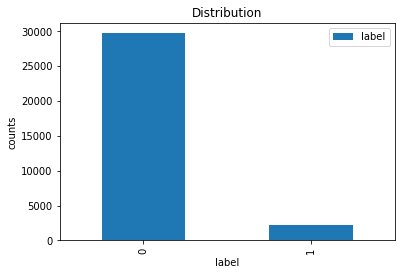

In [0]:
pd.value_counts(train['label']).plot.bar()
plt.title('Distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.legend()
plt.show()

**2. data Preprocessing and Cleaning**

a. Removing Twitter Handles (@user)

b. Removing Punctuations, Numbers, and Special Characters

c. Removing Short Words

d. Tokenization

e. Stemming





In [0]:
#define function
combi = train.append(test, ignore_index=True)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") # remove word start by@

In [0]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") #remove word NOT a-z OR A-Z

In [0]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 

In [0]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [0]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
#get back to data
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


**3. Visualization from Tweets**



a. Understanding the common words used in the tweets: using WordCloud





b. Understanding the impact of Hashtags on tweets



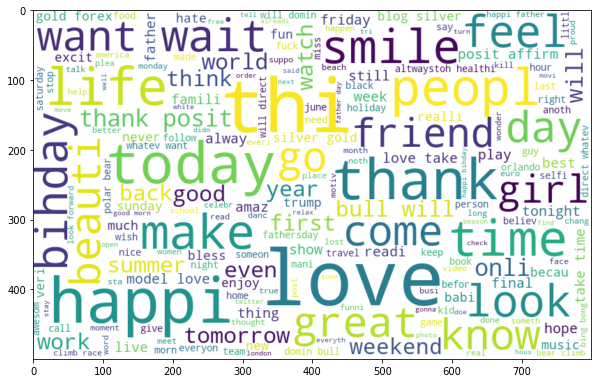

In [0]:
#common words 
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

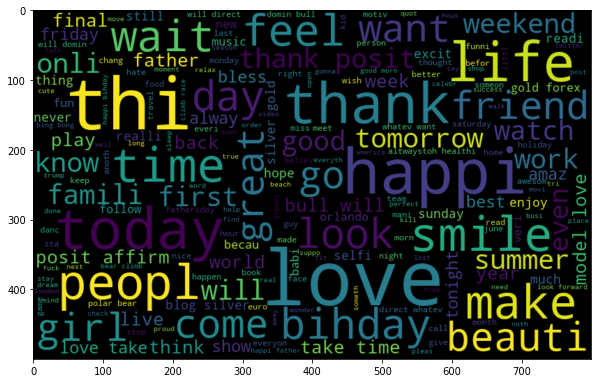

In [0]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

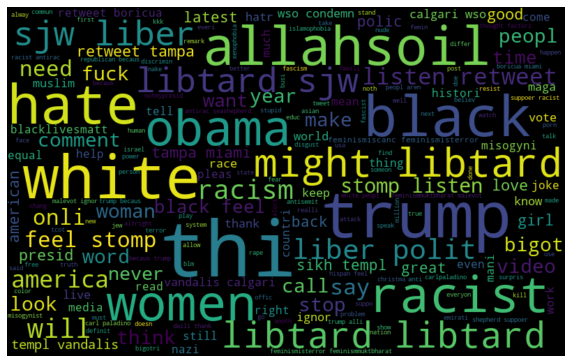

In [0]:
#word in racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)# 
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_normal = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_normal = sum(HT_normal,[])
HT_negative = sum(HT_negative,[])

     Hashtag  Count
0        run     72
1       lyft      2
2  disapoint      1
3   getthank      2
4      model    375


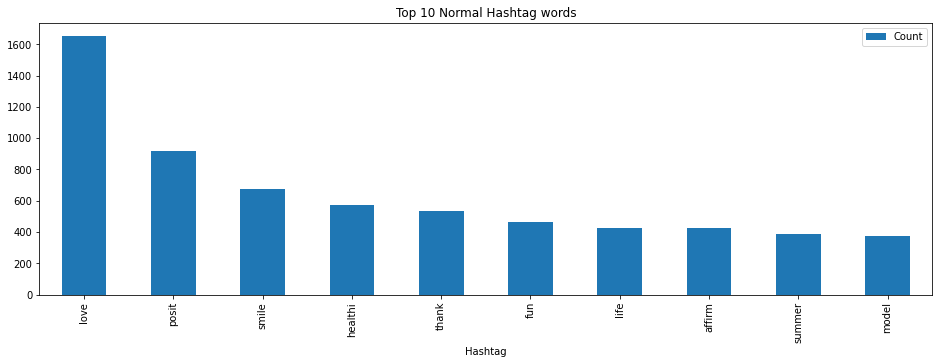

In [0]:
#Hashtag in Non-Racist/Sexist Tweets visual
a = nltk.FreqDist(HT_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
print(d.head())
top10normalword = d.sort_values("Count",ascending=False).head(10)

top10normalword.plot(kind='bar',title='Top 10 Normal Hashtag words', x= "Hashtag", y = "Count", figsize=(16,5 ))
plt.show()


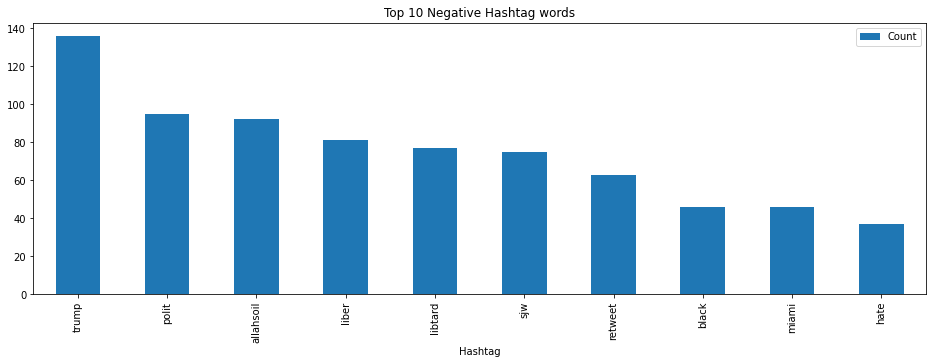

In [0]:
# hastag in racist/Sexist Tweets visual
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
top10negativeword = e.sort_values("Count",ascending=False).head(10)

top10negativeword.plot(kind='bar',title='Top 10 Negative Hashtag words', x= "Hashtag", y = "Count", figsize=(16,5 ))
plt.show()

**4. Extracting Features from Cleaned Tweets**

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')# ingore term apprer> 0,9 and <0.1 in documerts, 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 2000)

In [0]:
#TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 20000)

**5. Model Building: Sentiment Analysis**

In [0]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
from sklearn.metrics import accuracy_score
#Building model using Bag-of-Words features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

y_pred = lreg.predict(xvalid_bow)
print ("Accuracy: %.2f %%" %(100*accuracy_score(yvalid, y_pred)))



Accuracy: 95.14 %


In [0]:
#label test data and export to csv file
test_pred = lreg.predict(test_bow)
test['label'] = test_pred
print(test.tail())
test['label'].value_counts()


          id                                              tweet  label
17192  49155  thought factory: left-right polarisation! #tru...      1
17193  49156  feeling like a mermaid ð #hairflip #neverre...      0
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...      0
17195  49158  happy, at work conference: right mindset leads...      0
17196  49159  my   song "so glad" free download!  #shoegaze ...      0


0    16455
1      742
Name: label, dtype: int64

In [0]:
#Building model using TF-IDF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [0]:

lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain) # training the model

y_pred = lreg.predict(xvalid_tfidf)
print ("Accuracy: %.2f %%" %(100*accuracy_score(yvalid, y_pred)))
print(y_pred)

Accuracy: 94.48 %
[0 0 0 ... 0 0 0]


In [0]:
#label TF-IDF test file and export to csv file
test_pred = lreg.predict(test_tfidf)
test['label'] = test_pred
print(test.tail())
test.to_csv("test_label-tfidf.csv", index=False)


          id                                              tweet  label
17192  49155  thought factory: left-right polarisation! #tru...      1
17193  49156  feeling like a mermaid ð #hairflip #neverre...      0
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...      0
17195  49158  happy, at work conference: right mindset leads...      0
17196  49159  my   song "so glad" free download!  #shoegaze ...      0
